In [1]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
from os import listdir,makedirs
from os.path import isfile,join
import cv2

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout,  Conv2D, Input, Lambda, Flatten, TimeDistributed
from tensorflow.keras.layers import Add, Reshape, MaxPooling2D, Concatenate, Embedding, RepeatVector, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers.core import Dense, Dropout, Activation
import np_utils
from keras.src.utils.np_utils import to_categorical
from keras.layers import Dense, Dropout, Activation,Layer
#from keras.engine.topology import Layer
from tensorflow.keras.callbacks import TensorBoard
from keras.layers import LeakyReLU
import os
import shutil

2024-04-19 12:11:31.875039: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-19 12:11:31.882218: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-19 12:11:31.956535: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-19 12:11:31.956594: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-19 12:11:31.958613: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:

#gt=os.path.join('/content/drive/MyDrive/Anomaly/BTech_Dataset_transformed/02/ground_truth')
#train_path='/content/drive/MyDrive/Anomaly/BTech_Dataset_transformed/02/train/ok'
#test_path='/content/drive/MyDrive/Anomaly/BTech_Dataset_transformed/02/test/ko'

# gt=os.path.join('/home/ai/Pritha/mvt/toothbrush/ground_truth/hole')
# train_path='/home/ai/Pritha/mvt/toothbrush/train/good'
# test_path='/home/ai/Pritha/mvt/toothbrush/test/defective'

# gt=os.path.join('/home/ai/Pritha/mvt/screw/ground_truth/scratch_neck')
train_path='/home/ai/Pritha/mvt/leather/train/good'
#test_path='/home/ai/Pritha/mvt/hazelnut/test/hole'
test_path='/home/ai/Pritha/autoencoder_with_3_layers/leather/test2/2_defective/defective'

#files2 = glob.glob(test_path + '/*.png', recursive=True)

# train_path='/home/ai/Pritha/try_mvtec/GRID/test/0_good/good'
# test_path='/home/ai/Pritha/try_mvtec/GRID/test/1_defective/defective'

In [3]:
SIZE=128
batch_size = 20
from os.path import join

sz=len(os.listdir(train_path))
sz1=len(os.listdir(test_path))
y_train=np.zeros(sz)
train=np.zeros(shape=(sz,SIZE,SIZE,3))
merge=np.zeros(shape=((sz+sz1),SIZE,SIZE,3))
cnt=0
k=0
for r in os.listdir(train_path):
  img=Image.open(join(train_path,r)).resize((SIZE,SIZE))
  img=np.array(img,dtype=np.float32)/float(256)
  #print(img.shape)  
  train[cnt,:,:,:]=img
  merge[k,:,:,:]=img
  y_train[cnt]=0
  cnt=cnt+1
  k=k+1
#print('y_train')
#print(y_train.shape)

test=np.zeros(shape=(sz1,SIZE,SIZE,3))
y_test=np.zeros(sz1)
cnt=0
for r in os.listdir(test_path):
  img=Image.open(join(test_path,r)).resize((SIZE,SIZE))
  #img=Image.open(r.resize((SIZE,SIZE))  
  img=np.array(img,dtype=np.float32)/float(256)
  test[cnt,:,:,:]=img
  merge[k,:,:,:]=img
  y_test[cnt]=1
  cnt=cnt+1
  k=k+1

X_train=train
X_test=test
#X_train = X_train.astype('float32') / 255.
#X_test = X_test.astype('float32') / 255.
#X_train = np.reshape(X_train, (len(X_train), SIZE, SIZE,3))
#X_test = np.reshape(X_test, (len(X_test), SIZE, SIZE, 3))

print(X_test.shape)


#plt.imshow(X_test[2])

(92, 128, 128, 3)


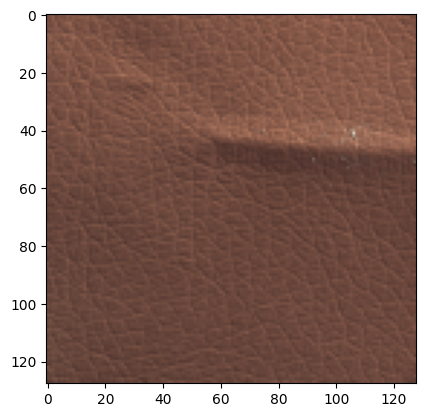

In [4]:
plt.imshow(X_test[2])

In [5]:
test=np.zeros(shape=(sz1,SIZE,SIZE,3))
y_test=np.zeros(sz1)
cnt=0
for r in os.listdir(test_path):
  img=Image.open(join(test_path,r)).resize((SIZE,SIZE))
  #img=Image.open(r.resize((SIZE,SIZE))  
  img=np.array(img,dtype=np.float32)/float(256)
  test[cnt,:,:,:]=img
  merge[k,:,:,:]=img
  y_test[cnt]=1
  cnt=cnt+1
  k=k+1

X_train=train
X_test=test
#X_train = X_train.astype('float32') / 255.
#X_test = X_test.astype('float32') / 255.
#X_train = np.reshape(X_train, (len(X_train), SIZE, SIZE,3))
#X_test = np.reshape(X_test, (len(X_test), SIZE, SIZE, 3))

print(X_test)

IndexError: index 461 is out of bounds for axis 0 with size 461

In [60]:
test=np.zeros(shape=(sz1,SIZE,SIZE,3))
y_test=np.zeros(sz1)
cnt=0
for r in files2:
    
  # img=Image.open(join(test_path,r)).resize((SIZE,SIZE))
    img=Image.open(r.resize((SIZE,SIZE))  
#     img=np.array(img,dtype=np.float32)/float(256)
#     test[cnt,:,:,:]=img
#     merge[k,:,:,:]=img
#     y_test[cnt]=1
#     cnt=cnt+1
#     k=k+1

# X_train=train
# X_test=test
#X_train = X_train.astype('float32') / 255.
#X_test = X_test.astype('float32') / 255.
#X_train = np.reshape(X_train, (len(X_train), SIZE, SIZE,3))
#X_test = np.reshape(X_test, (len(X_test), SIZE, SIZE, 3))

# print(X_test)

SyntaxError: unexpected EOF while parsing (3793786997.py, line 22)

In [6]:
print((X_train.shape))
print((X_test.shape))
#print(len((test_path)))
#print(cnt)for r in os.listdir(test_path)

(245, 128, 128, 3)
(92, 128, 128, 3)


In [69]:
for r in os.listdir(test_path):
    print(r)

hole_010.png
crack_011.png
cut_003.png
print_013.png
hole_001.png
hole_002.png
crack_012.png
hole_007.png
print_008.png
print_016.png
hole_006.png
hole_013.png
print_002.png
cut_011.png
crack_006.png
cut_015.png
crack_004.png
print_006.png
print_007.png
print_003.png
cut_002.png
crack_001.png
cut_000.png
hole_015.png
crack_005.png
hole_011.png
print_004.png
cut_007.png
crack_015.png
hole_005.png
cut_010.png
cut_009.png
print_000.png
crack_010.png
crack_009.png
cut_014.png
hole_003.png
print_012.png
crack_014.png
cut_005.png
print_014.png
crack_007.png
cut_013.png
cut_006.png
crack_008.png
print_005.png
crack_016.png
crack_017.png
crack_013.png
hole_017.png
hole_009.png
hole_004.png
print_011.png
crack_003.png
cut_008.png
print_015.png
crack_002.png
cut_004.png
print_010.png
print_001.png
hole_016.png
hole_012.png
hole_008.png
cut_001.png
print_009.png
hole_000.png
cut_012.png
hole_014.png
cut_016.png
crack_000.png


In [5]:
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow(X_train, y_train, batch_size=batch_size)

validation_generator =datagen.flow(X_train, y_train, batch_size=batch_size)


anomaly_generator = datagen.flow(X_test, y_test , batch_size=batch_size)

print(train_generator)

In [22]:
path = '/home/ai/Pritha/mvt/hazelnut/test/hole' # Source Folder
dstpath = 'hazel/test/1_defective/defective' # Destination Folder
try:
    makedirs(dstpath)
except:
    print ("Directory already exist, images will be written in same folder")

files = list(filter(lambda f: isfile(join(path,f)), listdir(path)))
for image in files:
    try:
        img = cv2.imread(os.path.join(path,image))
        #gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        dstPath = join(dstpath,image)
        cv2.imwrite(dstPath,img)
    except:
        print ("{} is not converted".format(image))

path = '/home/ai/Pritha/mvt/hazelnut/train/good' # Source Folder
dstpath = 'hazel/test/0_good/good' # Destination Folder

try:
    makedirs(dstpath)
except:
    print ("Directory already exist, images will be written in same folder")

files = list(filter(lambda f: isfile(join(path,f)), listdir(path)))
for image in files:
    try:
        img = cv2.imread(os.path.join(path,image))
        #gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
        #gray_three = cv2.merge([gray,gray,gray])
        dstPath = join(dstpath,image)
        cv2.imwrite(dstPath,img)
    except:
        print ("{} is not converted".format(image))

In [6]:
image_size = 128
batch_size = 10
datagen = ImageDataGenerator(rescale=1./255)
train_generator = datagen.flow_from_directory(
    '/home/ai/Pritha/mvt/leather/train/',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='input'
    )

validation_generator = datagen.flow_from_directory(
    '/home/ai/Pritha/mvt/leather/train/',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='input'
    )

anomaly_generator = datagen.flow_from_directory(
    '/home/ai/Pritha/autoencoder_with_3_layers/leather/test2/2_defective/',
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='input'
    )

test_generator = datagen.flow_from_directory(
    '/home/ai/Pritha/autoencoder_with_3_layers/leather/test2',
    target_size=(image_size, image_size),
    batch_size=1,
    class_mode='binary'
    )

Found 245 images belonging to 1 classes.
Found 245 images belonging to 1 classes.
Found 92 images belonging to 1 classes.
Found 92 images belonging to 1 classes.


In [5]:
from tensorflow.python.ops.math_ops import xdivy
def SSIMLoss(y_true, y_pred):
    print(y_pred.shape)
    print(y_true.shape)
   # y_pred = tf.reshape(y_pred,[-1,128,128,1])
   # y_true = tf.reshape(y_true,[-1,128,128,1])
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred,1.0))

In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the Autoencoder with Attention
def autoencoder_with_attention(input_shape):
    # Encoder
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), padding='same')(inputs)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    print(x.shape)
    x = layers.Conv2D(64, (3, 3), padding='same')(inputs)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    print(x.shape)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    print(x.shape)

    # # Attention Mechanism
    # attention = layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same')(x)
    # print(attention.shape)
    # #attention = layers.UpSampling2D((2, 2))(attention)
    # #attention = layers.UpSampling2D((2, 2))(attention)
    # print(attention.shape)
    # attention = layers.multiply([x, attention])

    # Decoder
    x = layers.Conv2D(128, (3, 3), padding='same')(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.UpSampling2D((2, 2))(x)
    print(x.shape)
    x = layers.Conv2D(64, (3, 3), padding='same')(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    x = layers.UpSampling2D((2, 2))(x)
    print(x.shape)
    x = layers.Conv2D(32, (3, 3), padding='same')(x)
    x = layers.LeakyReLU(alpha=0.1)(x)
    #x = layers.UpSampling2D((2, 2))(x)
    
    print(x.shape)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
    print(decoded.shape)


    # Model
    model = models.Model(inputs, decoded)
    return model

# Example usage
input_shape = (128, 128, 3)  # Adjust input shape based on your data
model = autoencoder_with_attention(input_shape)
#model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()

(None, 64, 64, 32)
(None, 64, 64, 64)
(None, 32, 32, 128)
(None, 64, 64, 128)
(None, 128, 128, 64)
(None, 128, 128, 32)
(None, 128, 128, 3)
Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_32 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 64, 64, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 64, 64, 128)       73856     
                                                   

/home/ai/anaconda3/envs/py39tf215cpu/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/2300
(None, 128, 128, 3)
(None, 128, 128, 3)


2024-04-19 12:17:37.448369: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] remapper failed: INVALID_ARGUMENT: Mutation::Apply error: fanout 'gradient_tape/model_4/leaky_re_lu_25/LeakyRelu/LeakyReluGrad' exist for missing node 'model_4/conv2d_32/BiasAdd'.


20/20 [==============================] - ETA: 0s - loss: 0.2726(None, 128, 128, 3)
(None, 128, 128, 3)
20/20 [==============================] - 12s 527ms/step - loss: 0.2726 - val_loss: 0.3711
Epoch 2/2300
20/20 [==============================] - 10s 481ms/step - loss: 0.2468 - val_loss: 0.3575
Epoch 3/2300
20/20 [==============================] - 10s 477ms/step - loss: 0.2428 - val_loss: 0.3609
Epoch 4/2300
20/20 [==============================] - 10s 479ms/step - loss: 0.2361 - val_loss: 0.3501
Epoch 5/2300
20/20 [==============================] - 9s 473ms/step - loss: 0.2301 - val_loss: 0.3263
Epoch 6/2300
20/20 [==============================] - 10s 485ms/step - loss: 0.2203 - val_loss: 0.3125
Epoch 7/2300
20/20 [==============================] - 9s 471ms/step - loss: 0.2067 - val_loss: 0.2926
Epoch 8/2300
20/20 [==============================] - 9s 475ms/step - loss: 0.2001 - val_loss: 0.2766
Epoch 9/2300
20/20 [==============================] - 9s 472ms/step - loss: 0.1850 - val_

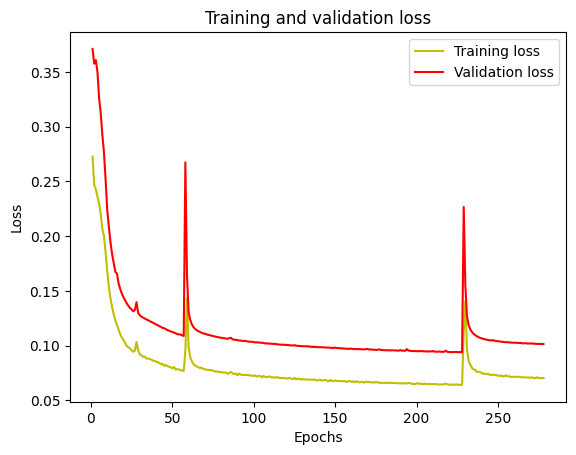

In [11]:

from keras.models import load_model
#from tf.keras import get_custom_objects

#get_custom_objects().update({'SSIMLoss': SSIMLoss})

import keras.losses

keras.losses.custom_loss = SSIMLoss

model.compile(optimizer='adam', loss='SSIMLoss')

model.save('leather_a.h5')
model = tf.keras.models.load_model('leather_a.h5',custom_objects ={'SSIMLoss':SSIMLoss})
#(X_train, X_train)
# Training the model
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50) # Early stopping (stops training when validation doesn't improve for {patience} epochs)
model_filepath = 'leather_a.h5'
save_best = keras.callbacks.ModelCheckpoint(model_filepath, monitor='val_loss', save_best_only=True, mode='min') # Saves the best version of the model to disk (as measured on the validation data set)
# history= model.fit_generator(
#         train_generator,
#         epochs=300,
#         validation_data=validation_generator,
#         shuffle = True,
#         callbacks=[es, save_best])

history = model.fit(
       X_train,X_train,
       steps_per_epoch= 20 ,#// batch_size,
       epochs=2300,
       validation_data=(X_test,X_test),
      # validation_steps=75 // batch_size,
       shuffle = True,
callbacks=[es, save_best])

#plot the training and validation accuracy and loss at each epoch
model.save('leather_a.h5')
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

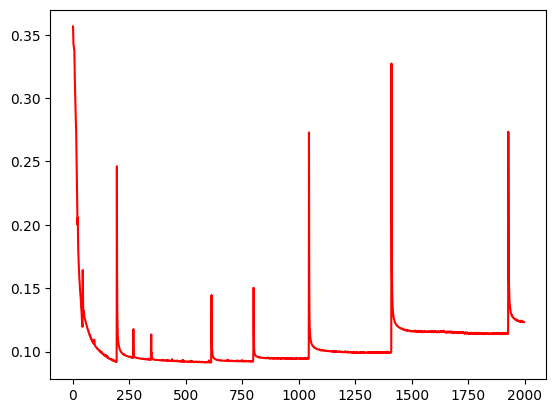

In [13]:
plt.plot(epochs, val_loss, 'r', label='Validation loss')

1/1 [==============================] - 0s 165ms/step


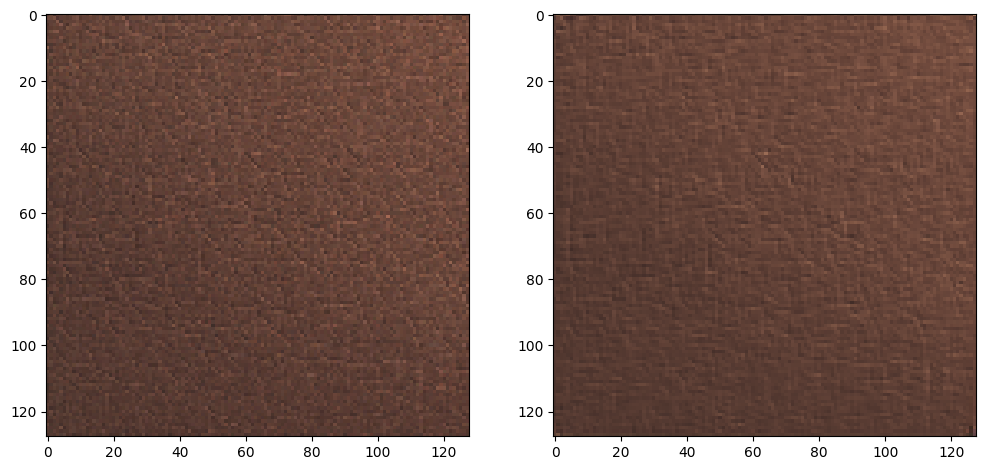

In [14]:
data_batch = []  #Capture all training batches as a numpy array
img_num = 0
while img_num <= train_generator.batch_index:   #gets each generated batch of size batch_size
    data = train_generator.next()
    data_batch.append(data[0])
    img_num = img_num + 1

predicted = model.predict(data_batch[0])  #Predict on the first batch of images
image_number = random.randint(0, predicted.shape[0])
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(data_batch[0][image_number])
plt.subplot(122)
plt.imshow(predicted[image_number])
plt.show()

8/8 [==============================] - 1s 166ms/step


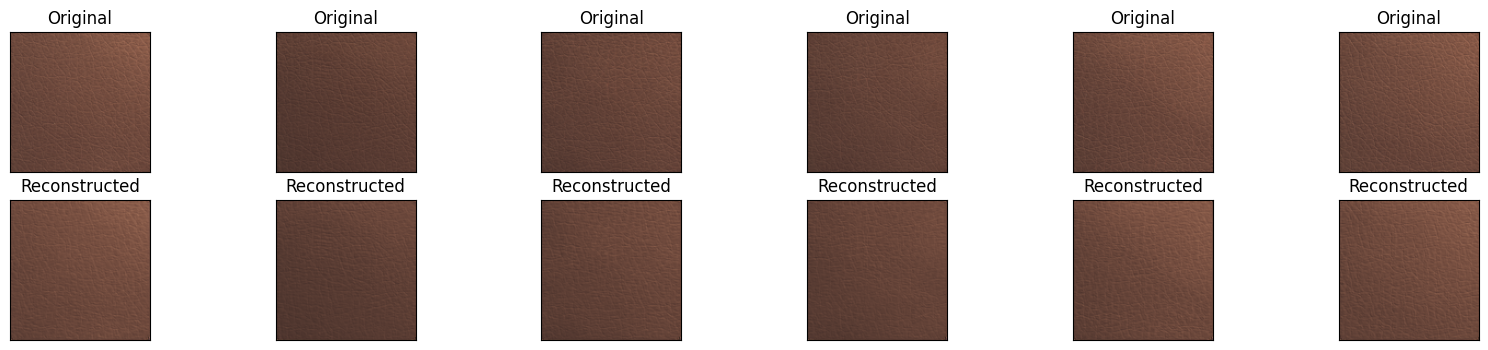

In [15]:
data_batch = []  #Capture all training batches as a numpy array
img_num = 0
while img_num <= train_generator.batch_index:   #gets each generated batch of size batch_size
    data = train_generator.next()
    data_batch.append(data[0])
    img_num = img_num + 1

predicted = model.predict(data_batch[0])

decoded_imgs = model.predict(X_train)
n = 6
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    plt.title("Original")
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.title("Reconstructed")
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [8]:
from keras.models import load_model
#from tf.keras import get_custom_objects

#get_custom_objects().update({'SSIMLoss': SSIMLoss})

import keras.losses

keras.losses.custom_loss = SSIMLoss

model.compile(optimizer='adam', loss='SSIMLoss')


model = tf.keras.models.load_model('leather3.h5',custom_objects ={'SSIMLoss':SSIMLoss})

In [9]:
dataset_name='Leather'

NameError: name 'decoded_imgs' is not defined

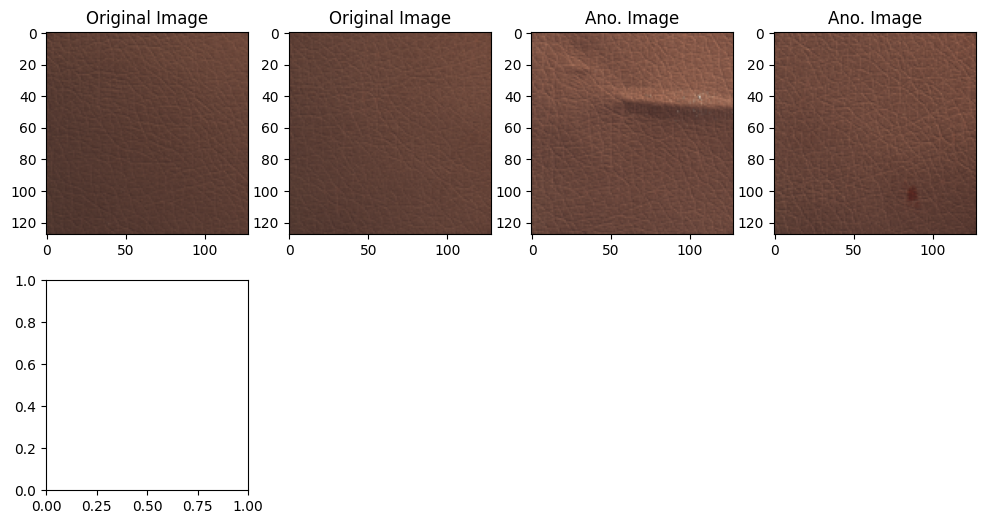

In [12]:
plt.figure(figsize=(12, 6))
i=2
j=4
ax = plt.subplot(2, 4, 1 )
plt.imshow(X_train[i].reshape(SIZE,SIZE,3))
ax.set_title("Original Image")
ax = plt.subplot(2, 4, 2 )
plt.imshow(X_train[j].reshape(SIZE,SIZE,3))
ax.set_title("Original Image")
ax = plt.subplot(2, 4, 3 )
plt.imshow(X_test[i].reshape(SIZE,SIZE,3))
ax.set_title("Ano. Image") 

ax = plt.subplot(2, 4, 4 )
plt.imshow(X_test[j].reshape(SIZE,SIZE,3))
ax.set_title("Ano. Image")


ax = plt.subplot(2, 4, 5 )
plt.imshow(decoded_imgs[i].reshape(SIZE,SIZE,3))
ax.set_title("Recon. Image")
gg=tf.dtypes.cast(X_train[i], tf.float32)
value_a = SSIMLoss(decoded_imgs[i], gg)
label = 'SSIM Loss value: {:.3f}'
ax.set_xlabel(label.format(value_a) )

ax = plt.subplot(2, 4, 6 )
plt.imshow(decoded_imgs[j].reshape(SIZE,SIZE,3))
ax.set_title("Recon. Image")
gg=tf.dtypes.cast(X_train[j], tf.float32)
value_a = SSIMLoss(decoded_imgs[j], gg)
label = 'SSIM Loss value: {:.3f}'
ax.set_xlabel(label.format(value_a) )

ax = plt.subplot(2, 4, 7 )
plt.imshow(decoded_mnistimgs[i].reshape(SIZE,SIZE,3))
ax.set_title("Recon. Ano. Image")
gg12=tf.dtypes.cast(X_test[i], tf.float32)
value = SSIMLoss(decoded_mnistimgs[i], gg12)
label = 'SSIM Loss value: {:.3f}'
ax.set_xlabel(label.format(value) )

ax = plt.subplot(2, 4, 8 )
plt.imshow(decoded_mnistimgs[j].reshape(SIZE,SIZE,3))
ax.set_title("Reconst. Ano. Image")
gg12=tf.dtypes.cast(X_test[j], tf.float32)
value = SSIMLoss(decoded_mnistimgs[j], gg12)
label = 'SSIM Loss value: {:.3f}'
ax.set_xlabel(label.format(value) )

plt.savefig(f'{dataset_name}_compar.jpg')

3/3 [==============================] - 1s 164ms/step
92
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


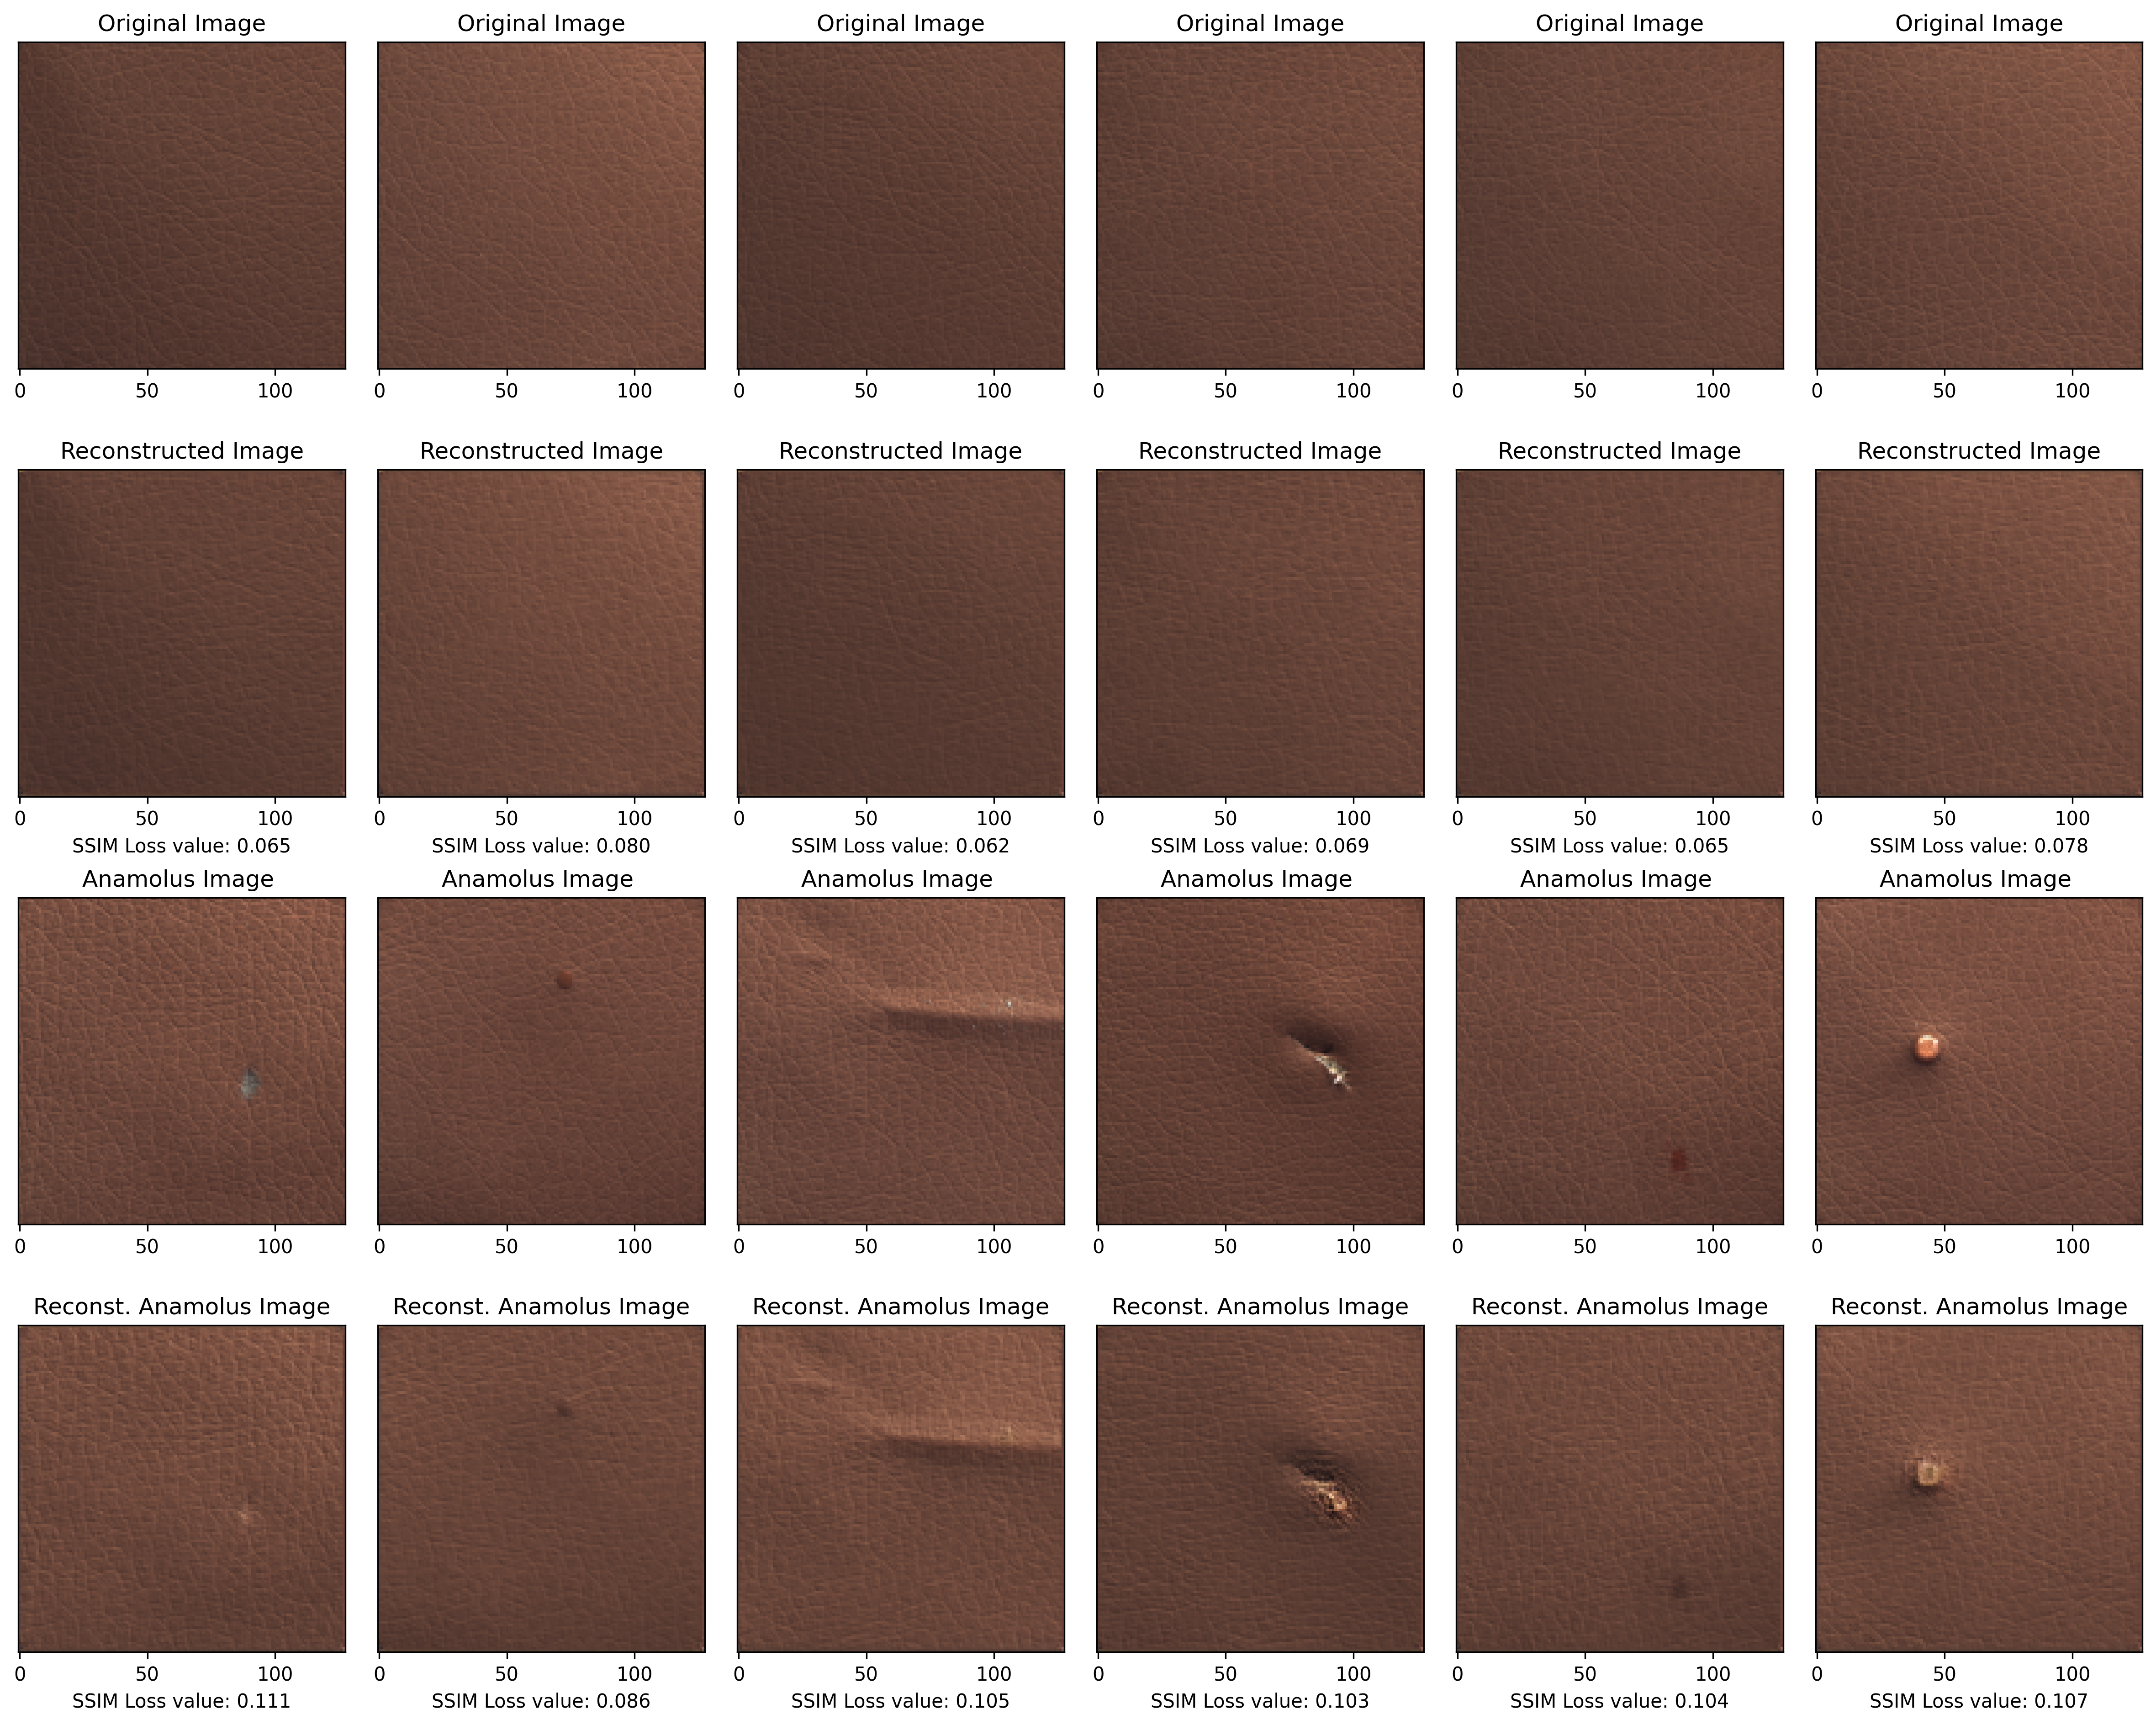

In [13]:
n = 6  # how many encoded and decoded images we will display
decoded_imgs= model.predict(X_train)
decoded_mnistimgs= model.predict(X_test)
print(len(decoded_mnistimgs))
plt.figure(figsize=(20, 20), dpi=300)
plt.subplots_adjust( wspace=0.1, hspace=0.07)
plt_a=1
SSIM_array=[]
for i in range(n):
    # Original training dataset vs Original training
    ax = plt.subplot(5, n, plt_a   )
    plt.imshow(X_train[i].reshape(SIZE,SIZE,3))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    value_a = SSIMLoss(X_train[i], X_train[i])

    ax.set_title("Original Image")
   # label = 'SSIM Loss value: {:.3f}'
   # ax.set_xlabel(label.format(value_a) )

    # Reconstructed good data  vs Original training data
    ax = plt.subplot(5, n, plt_a + n )
    plt.imshow(decoded_imgs[i].reshape(SIZE,SIZE,3))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    gg=tf.dtypes.cast(X_train[i], tf.float32)
    value_a = SSIMLoss(decoded_imgs[i], gg)
    SSIM_array.append(value_a)
    ax.set_title("Reconstructed Image")
    label = 'SSIM Loss value: {:.3f}'
    ax.set_xlabel(label.format(value_a) )



    


    ax = plt.subplot(5, n, plt_a + 2*n )
    plt.imshow(X_test[i].reshape(SIZE,SIZE,3))
    ax.set_title("Anamolus Image " )
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    #gg=tf.dtypes.cast(X_train[i], tf.float32)

    # Reconstructed anomalous data  vs Original training data
    ax = plt.subplot(5, n, plt_a + 3*n)
    plt.imshow(decoded_mnistimgs[i].reshape(SIZE,SIZE,3))
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(False)
    gg1=tf.dtypes.cast(X_test[i], tf.float32)
    value = SSIMLoss(decoded_mnistimgs[i], gg1)
    SSIM_array.append(value)
    label = 'SSIM Loss value: {:.3f}'
    ax.set_title(" Reconst. Anamolus Image " )
    ax.set_xlabel(label.format(value) )
    plt_a+=1
plt.savefig('Leather_reconst_ssim.jpg')
plt.show()

In [19]:
SSIM_arr=[]
gt_arr=[]
for i in range(len(decoded_imgs)):
  gg=tf.dtypes.cast(X_train[i], tf.float32)
  value_a = SSIMLoss(decoded_imgs[i], gg)
  SSIM_arr.append(value_a)
  gt_arr.append(0)


for i in range(len(decoded_mnistimgs)):
  gg1=tf.dtypes.cast(X_test[i], tf.float32)
  value_a = SSIMLoss(decoded_mnistimgs[i], gg1)
  SSIM_arr.append(value_a)
  gt_arr.append(1)
print(len(SSIM_arr))

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [20]:
print(np.array(SSIM_arr))
print(np.array(gt_arr))

[0.06488782 0.0801928  0.0616982  0.06939888 0.0650301  0.07800084
 0.08619833 0.08111256 0.07787436 0.06749541 0.06686419 0.07162184
 0.06189114 0.07443929 0.07114476 0.06879896 0.07075804 0.06811863
 0.07342941 0.06513113 0.0642336  0.06838948 0.05914038 0.07617396
 0.07115459 0.06827027 0.0777846  0.05850101 0.06472439 0.07497925
 0.07489151 0.06237435 0.06236321 0.06030154 0.06477159 0.06343323
 0.0696401  0.06555718 0.08993006 0.06285113 0.07744533 0.08377045
 0.06947166 0.06565315 0.06736231 0.07690001 0.05994129 0.06483251
 0.06325597 0.06864244 0.06651402 0.07117206 0.06588572 0.0651266
 0.06211406 0.07300806 0.07800633 0.06829482 0.07401448 0.0641579
 0.06719589 0.07868439 0.05991721 0.06609446 0.06428629 0.06345481
 0.07818979 0.06584454 0.07000303 0.05648261 0.05902702 0.0828855
 0.07073683 0.05146676 0.06675559 0.08350295 0.05816507 0.07112128
 0.06797647 0.07934743 0.06060314 0.06335551 0.07193494 0.07486159
 0.06502146 0.05779117 0.07386321 0.07632595 0.08719045 0.0585067

In [21]:
np.save("gt_arr.npy",np.array(gt_arr))
np.save("SSIM_arr.npy",np.array(SSIM_arr))

In [22]:
#np_load_old = np.load

# modify the default parameters of np.load
#np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
y_true = np.load('SSIM_arr.npy') #FL preidcted regularity scores
print('Shape of SSIM_arr', y_true.shape)
y_pred = np.load('gt_arr.npy') #FL ground truth
print('gt_arr.npy', y_pred.shape)
#np.load = np_load_old

Shape of SSIM_arr (337,)
gt_arr.npy (337,)


Text(0, 0.5, 'True Positive Rate')

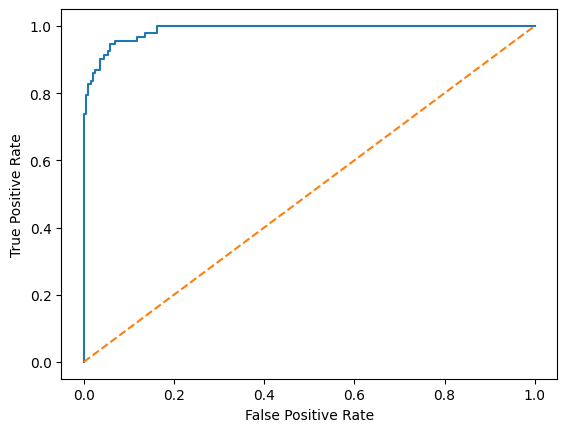

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import roc_curve, auc
from numpy import sqrt
from numpy import argmax

fpr, tpr, thresholds = roc_curve(y_pred, y_true)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='AUC-ROC curve = %0.3f' % roc_auc)
plt.plot([0,1], [0,1], linestyle='--', label='Binary Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

0.05714285714285714
0.05434782608695654
Area under the ROC curve : 0.988066
Best Threshold=0.085531, G-Mean=0.944
AUC-ROC=0.988066


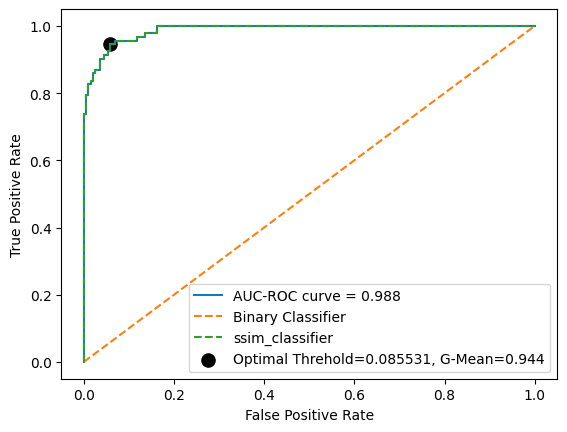

In [24]:
fpr, tpr, threshold = roc_curve(y_pred, y_true, pos_label=1)
n=np.array([tpr, fpr])
fnr = 1 - tpr
tnr= 1- fpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
dataset_name="Leather"
EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
print(EER)

#as a sanity check the value should be close to

EER = fnr[np.nanargmin(np.absolute((fnr - fpr)))]

print(EER)
print("Area under the ROC curve : %f" % roc_auc)
# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
print('AUC-ROC=%f'  % (roc_auc))
th=thresholds[ix]
plt.clf()
plt.plot(fpr, tpr, label='AUC-ROC curve = %0.3f' % roc_auc)
plt.plot([0,1], [0,1], linestyle='--', label='Binary Classifier')
plt.plot(fpr, tpr, linestyle='--', label='ssim_classifier')
#pyplot.plot(roc_auc='.', label='AUC-ROC')
#pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', s=90, label='Best')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', s=90, label='Optimal Threhold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig(f'{dataset_name}__OT.jpg',bbox_inches='tight')
plt.show()

In [28]:
import csv
print(np.transpose(n))
dataset_name="leather"
rows = ["{},{}".format(i, j) for i, j in np.transpose(n)]
text = "\n".join(rows)
              #  adding header
headerList = ['i_tpr', 'i_fpr']


                # converting data frame to csv
with open(f'{dataset_name}_image.csv', 'w') as f:
    dw = csv.DictWriter(f, delimiter=',',fieldnames=headerList)
    dw.writeheader()
    f.write(text)
                
print("-------------------------in_display2---------------------------")
                
print(tpr,fpr)

[[0.         0.        ]
 [0.01086957 0.        ]
 [0.83695652 0.        ]
 [0.83695652 0.00816327]
 [0.85869565 0.00816327]
 [0.85869565 0.0122449 ]
 [0.86956522 0.0122449 ]
 [0.86956522 0.01632653]
 [0.88043478 0.01632653]
 [0.88043478 0.02040816]
 [0.92391304 0.02040816]
 [0.92391304 0.04897959]
 [0.93478261 0.04897959]
 [0.93478261 0.05306122]
 [0.94565217 0.05306122]
 [0.94565217 0.05714286]
 [0.95652174 0.05714286]
 [0.95652174 0.08571429]
 [0.9673913  0.08571429]
 [0.9673913  0.11836735]
 [0.97826087 0.11836735]
 [0.97826087 0.12244898]
 [0.98913043 0.12244898]
 [0.98913043 0.15510204]
 [1.         0.15510204]
 [1.         1.        ]]
-------------------------in_display2---------------------------
[0.         0.01086957 0.83695652 0.83695652 0.85869565 0.85869565
 0.86956522 0.86956522 0.88043478 0.88043478 0.92391304 0.92391304
 0.93478261 0.93478261 0.94565217 0.94565217 0.95652174 0.95652174
 0.9673913  0.9673913  0.97826087 0.97826087 0.98913043 0.98913043
 1.         1.   

In [25]:
print(y_pred)
y_pred_binary=[]

for i in y_true:
  if i >=th:
    y_pred_binary.append(1)
  else:
    y_pred_binary.append(0)

y_pred_binary_1=np.array(y_pred_binary )
print(np.array(y_pred_binary))


tn, fp, fn, tp =confusion_matrix(y_pred,y_pred_binary_1).ravel()
acc=(tn+tp)/(tn+ fp+ fn+ tp)*100
print(confusion_matrix(y_pred,y_pred_binary_1))
acc

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 

94.3620178041543

In [26]:
f1_score(y_pred_binary,y_pred)

0.9015544041450777

In [27]:
from sklearn.metrics import average_precision_score

average_precision_score(y_pred, y_pred_binary)

0.8294084698109857

Best Threshold=0.100049, F-Score=0.934


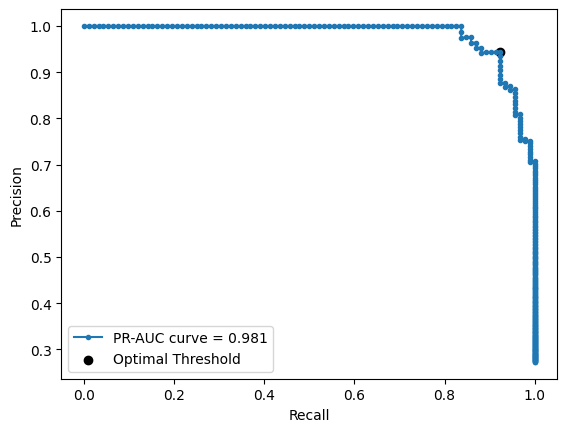

[[1.         0.27299703]
 [1.         0.27380952]
 [1.         0.27462687]
 [1.         0.2754491 ]
 [1.         0.27627628]
 [1.         0.27710843]
 [1.         0.27794562]
 [1.         0.27878788]
 [1.         0.27963526]
 [1.         0.2804878 ]
 [1.         0.28134557]
 [1.         0.28220859]
 [1.         0.28307692]
 [1.         0.28395062]
 [1.         0.28482972]
 [1.         0.28571429]
 [1.         0.28660436]
 [1.         0.2875    ]
 [1.         0.28840125]
 [1.         0.28930818]
 [1.         0.29022082]
 [1.         0.29113924]
 [1.         0.29206349]
 [1.         0.29299363]
 [1.         0.29392971]
 [1.         0.29487179]
 [1.         0.29581994]
 [1.         0.29677419]
 [1.         0.29773463]
 [1.         0.2987013 ]
 [1.         0.29967427]
 [1.         0.30065359]
 [1.         0.30163934]
 [1.         0.30263158]
 [1.         0.30363036]
 [1.         0.30463576]
 [1.         0.30564784]
 [1.         0.30666667]
 [1.         0.30769231]
 [1.         0.30872483]


In [19]:
import keras.losses

#keras.losses.custom_loss = SSIMLoss


#model = tf.keras.models.load_model('leather3.h5',custom_objects ={'SSIMLoss':SSIMLoss})
#model.compile(optimizer='adam', loss='SSIMLoss')

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

precision, recall, thresholds = precision_recall_curve(y_pred, y_true)
auc_score = auc(recall, precision)
p=np.array([recall, precision])
#pyplot.plot(recall, precision, marker='.', label='Logistic')
# convert to f score

fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
#no_skill = len(testy[testy==1]) / len(testy)
#pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='Binary')
pyplot.plot(recall, precision, marker='.',label='PR-AUC curve = %0.3f' % auc_score)
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Optimal Threshold')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

import csv
print(np.transpose(p))
dataset_name="Leather"
rows = ["{},{}".format(i, j) for i, j in np.transpose(p)]
text = "\n".join(rows)
              #  adding header
headerList = ['recall', 'precision']


                # converting data frame to csv
with open(f'{dataset_name}_pr.csv', 'w') as f:
    dw = csv.DictWriter(f, delimiter=',',fieldnames=headerList)
    dw.writeheader()
    f.write(text)
                
print("-------------------------in_display2---------------------------")
                
print(precision, recall)

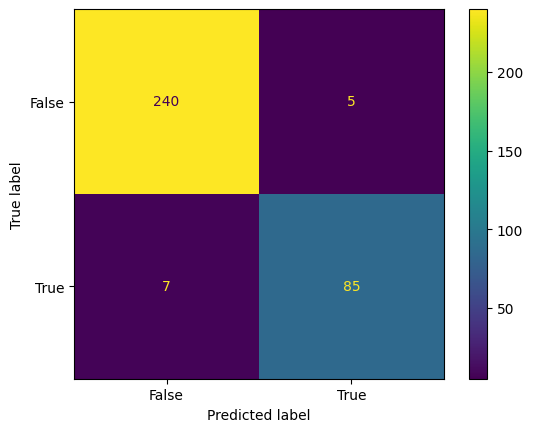

In [20]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

 

confusion_matrix = metrics.confusion_matrix(y_pred,y_pred_binary_1)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()

plt.savefig(f'{dataset_name}_conmat.jpg')
plt.show() 

In [2]:
import glob
import os
import shutil

# Location with subdirectories
dir_src = "/home/ai/Pritha/mvt/leather/test/"

# Destination location to copy all the files
dir_dst = "leather/test2/2_defective/defective"

# Get List of all images
files = glob.glob(dir_src + '/**/*.png', recursive=True)

# Create the destination directory
if not os.path.exists(dir_dst):
    makedirs(dir_dst)
    
x="good"
# For each image
for file_name_src in files:
    if x not in file_name_src:
                
    # Let's say file_name_src is currently "/home/nponcian/Documents/folder_with_subfolders/Subfolder_1/Subfolder1_1/Subfolder_with_patientID1/2.dcm"
         file_dir = os.path.basename(os.path.dirname(file_name_src))  # Would be "Subfolder_with_patientID1"
         file_name = os.path.basename(file_name_src)  # Would be "2.dcm"

         file_name_dst = os.path.join(dir_dst, f"{file_dir}_{file_name}")  # Would be "/home/nponcian/Documents/folder_with_subfolders_dest/Subfolder_with_patientID1_2.dcm"

         shutil.copy2(file_name_src, file_name_dst)
         print(f"Copied:\n\tFr: {file_name_src}\n\tTo: {file_name_dst}")

Copied:
	Fr: /home/ai/Pritha/mvt/leather/test/color/003.png
	To: leather/test2/2_defective/defective/color_003.png
Copied:
	Fr: /home/ai/Pritha/mvt/leather/test/color/013.png
	To: leather/test2/2_defective/defective/color_013.png
Copied:
	Fr: /home/ai/Pritha/mvt/leather/test/color/011.png
	To: leather/test2/2_defective/defective/color_011.png
Copied:
	Fr: /home/ai/Pritha/mvt/leather/test/color/016.png
	To: leather/test2/2_defective/defective/color_016.png
Copied:
	Fr: /home/ai/Pritha/mvt/leather/test/color/012.png
	To: leather/test2/2_defective/defective/color_012.png
Copied:
	Fr: /home/ai/Pritha/mvt/leather/test/color/014.png
	To: leather/test2/2_defective/defective/color_014.png
Copied:
	Fr: /home/ai/Pritha/mvt/leather/test/color/018.png
	To: leather/test2/2_defective/defective/color_018.png
Copied:
	Fr: /home/ai/Pritha/mvt/leather/test/color/000.png
	To: leather/test2/2_defective/defective/color_000.png
Copied:
	Fr: /home/ai/Pritha/mvt/leather/test/color/015.png
	To: leather/test2/2

In [45]:
x = "good"

dirname = "hazel/test2/2_defective/defective"
for file_name_src in files:
    #for x in list:
    #f=str(file_name_src)
    #print(f)
    if x not in file_name_src:
        print(file_name_src, x)

/home/ai/Pritha/mvt/hazelnut/test/hole/003.png good
/home/ai/Pritha/mvt/hazelnut/test/hole/013.png good
/home/ai/Pritha/mvt/hazelnut/test/hole/011.png good
/home/ai/Pritha/mvt/hazelnut/test/hole/016.png good
/home/ai/Pritha/mvt/hazelnut/test/hole/012.png good
/home/ai/Pritha/mvt/hazelnut/test/hole/014.png good
/home/ai/Pritha/mvt/hazelnut/test/hole/000.png good
/home/ai/Pritha/mvt/hazelnut/test/hole/015.png good
/home/ai/Pritha/mvt/hazelnut/test/hole/002.png good
/home/ai/Pritha/mvt/hazelnut/test/hole/008.png good
/home/ai/Pritha/mvt/hazelnut/test/hole/006.png good
/home/ai/Pritha/mvt/hazelnut/test/hole/017.png good
/home/ai/Pritha/mvt/hazelnut/test/hole/007.png good
/home/ai/Pritha/mvt/hazelnut/test/hole/005.png good
/home/ai/Pritha/mvt/hazelnut/test/hole/009.png good
/home/ai/Pritha/mvt/hazelnut/test/hole/001.png good
/home/ai/Pritha/mvt/hazelnut/test/hole/010.png good
/home/ai/Pritha/mvt/hazelnut/test/hole/004.png good
/home/ai/Pritha/mvt/hazelnut/test/print/003.png good
/home/ai/Pr

In [9]:
dataset_name='Leather'

3/3 [==============================] - 1s 329ms/step
(128, 128, 1)


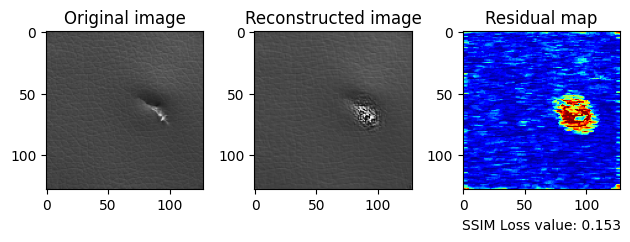

In [14]:
from skimage.metrics import structural_similarity as ski_ssim
fig, ax = plt.subplots(1, 3)
plt.gray()   
SIZE=128
cnt=0
t_img=np.zeros(shape=(1,SIZE,SIZE,3))


    
    # img = Image.open(image_path).resize((128,128))
    # original=img
    # img=np.array(img,dtype=np.float32)/float(256)
    # t_img[k,:,:,:]=img
    # print(t_img.shape)  
#img=Image.open(test_image_path_1).resize((SIZE,SIZE))

reconstructed= model.predict(X_test)

(row, col) = img.shape[0:2]
#img1= [[0] * row] * col
img1=np.zeros(shape=(row,col,1))
#img1=np.squeeze(img1)

img2=np.zeros(shape=(row,col,1))
#img2=np.squeeze(img1)
# Take the average of pixel values of the BGR Channels
# to convert the colored image to grayscale image
for i in range(row):
    for j in range(col):
        # Find the average of the BGR pixel values
        img1[i, j] = sum(X_test[3][i, j]) * 0.33
        img2[i, j] = sum(reconstructed[3][i, j]) * 0.33

print(img2.shape)
# img1 = cv2.imread(img, 0)
# img2 = cv2.imread(img_noise, 0)
# img1 = tensorify(img) # helper function to convert cv2 image to tensors
# img2 = tensorify(img)
#mse_none = mean_squared_error(img1, img1)
#ssim_none = ski_ssim(img1, img1, data_range=img.max() - img.min())

img_old=np.array(img1.squeeze(2))
img_new=np.array(img2.squeeze(2))

#mse_noise = mean_squared_error(img, img_noise)
# pixel_range = max(np.max(img1), np.max(img2)) - min(np.min(img1), np.min(img2))
# j,S = ski_ssim(img1, img2,
#                   full=True, channel_axis=False, data_range=pixel_range)
# print(pixel_range)
pixel_range = max(np.max(img_old), np.max(img_new)) - min(np.min(img_old), np.min(img_new))
j,S = ski_ssim(img_old, img_new, full=True, channel_axis=False, data_range=pixel_range)
# mse_const = mean_squared_error(img, img_const)
#ssim_const = ski_ssim(img_old, img_new)

ax[0].imshow(img1, cmap=plt.cm.gray, vmin=0, vmax=1)
#ax[0].set_xlabel(f'MSE: {mse_none:.2f}, SSIM: {ssim_none:.2f}')
ax[0].set_title('Original image')

ax[1].imshow(img2, cmap=plt.cm.gray, vmin=0, vmax=1)
#ax[1].set_xlabel(f'MSE: {mse_noise:.2f}, SSIM: {ssim_noise:.2f}')
ax[1].set_title('Reconstructed image')

# ax[2].imshow(img_const, cmap=plt.cm.gray, vmin=0, vmax=1)
# ax[2].set_xlabel(f'MSE: {mse_const:.2f}, SSIM: {ssim_const:.2f}')
# ax[2].set_title('Image plus constant')

ax[2].imshow(1-S, vmax = 1,cmap='jet')
ax[2].set_xlabel(f'SSIM Loss value: {1-j:.3f}')
ax[2].set_title("Residual map")

plt.tight_layout()
plt.savefig(f'{dataset_name}_Residual_map.jpg')
plt.show()